In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
from sklearn import datasets

In [3]:
boston = datasets.load_boston()

In [4]:
for key in boston.keys():
    print( key )

data
target
feature_names
DESCR
filename


In [5]:
data = pd.read_csv(boston['filename'],skiprows=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
data.shape

(506, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
# попробуем выбрать какие-нибудь признаки
selectedColumns = data[ [ 'CRIM','RM','LSTAT','PTRATIO','MEDV' ] ]
#selectedColumns = data[ [ 'CRIM','PTRATIO','TAX','RAD', 'LSTAT','MEDV' ] ]

In [9]:
X = selectedColumns

# столбец MEDV является целевой переменной, удаляем его из X
del X['MEDV']
X.head()

,CRIM,RM,LSTAT,PTRATIO
0,0.00632,6.575,4.98,15.3
1,0.02731,6.421,9.14,17.8
2,0.02729,7.185,4.03,17.8
3,0.03237,6.998,2.94,18.7
4,0.06905,7.147,5.33,18.7


In [10]:
data['MEDV'].unique()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

In [11]:
(len(data['MEDV']))

506

In [12]:
#clustering
data[(data['MEDV']<= 20)]=1.
data[(data['MEDV']> 20)&(data['MEDV']<= 30)]=2.
data[(data['MEDV']>= 30)]=3.


In [13]:
data['MEDV'].unique()

array([2., 3., 1.])

In [14]:
from collections import Counter
Counter(data['MEDV'])

Counter({2.0: 207, 3.0: 84, 1.0: 215})

In [15]:
y=data['MEDV']

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [17]:
model.fit( X, y )
predictions = model.predict_proba( X )

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
predictions[:5]

array([[0.00688636, 0.40757756, 0.58553608],
       [0.11814768, 0.83800562, 0.0438467 ],
       [0.00326782, 0.21525411, 0.78147808],
       [0.00403887, 0.29107958, 0.70488156],
       [0.01314643, 0.43624852, 0.55060505]])

In [19]:
model.score(X, y)

0.8023715415019763

In [20]:
y

0      2.0
1      2.0
2      3.0
3      3.0
4      3.0
      ... 
501    2.0
502    2.0
503    2.0
504    2.0
505    1.0
Name: MEDV, Length: 506, dtype: float64

In [21]:
def HEntropy(l):
    length = len(l)
    cnt = Counter(l)
    
    ent = 0
    for cl in cnt.values():
        p = cl / length
        l2 = np.log2(p)
        it = -p * l2
        ent += it
    
    return ent

In [22]:
def HGini(l):
    length = len(l)
    cnt = Counter(l)
    
    gini = 0
    for cl in cnt.values():
        p_1 = cl / length
        p_2 = (1 - p_1)
        it = p_1 * p_2
        gini += it
    
    return gini

In [23]:
def IG(H, l, i):
    left_l = l[:i]
    right_l = l[i:]
    return H(l) - (len(left_l) / len(l)) * H(left_l) - (len(right_l) / len(l)) * H(right_l)

In [24]:
def test_H(H, l):
    print("{:5} {:3}   {:4} {:4} {:4}".format("#","l","IG","Hl","Hr"))
    print("-"*24)
    i_max,IG_max=0,0
    for i in range(0,len(l)):
        print(f"{i:2}. {l[i]:3}   {IG(H, l, i):.2f} {H(l[:i]):.2f} {H(l[i:]):.2f}")
        if IG_max < IG(H, l, i):
            i_max, IG_max = i, IG(H, l, i)
    print(f'Деление после элемента:{i_max-1}')

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
X = pd.DataFrame(selectedColumns)
y = pd.DataFrame(y)
df = pd.concat([X,y], axis=1)

In [27]:
df.head()

,CRIM,RM,LSTAT,PTRATIO,MEDV
0,0.00632,6.575,4.98,15.3,2.0
1,0.02731,6.421,9.14,17.8,2.0
2,0.02729,7.185,4.03,17.8,3.0
3,0.03237,6.998,2.94,18.7,3.0
4,0.06905,7.147,5.33,18.7,3.0


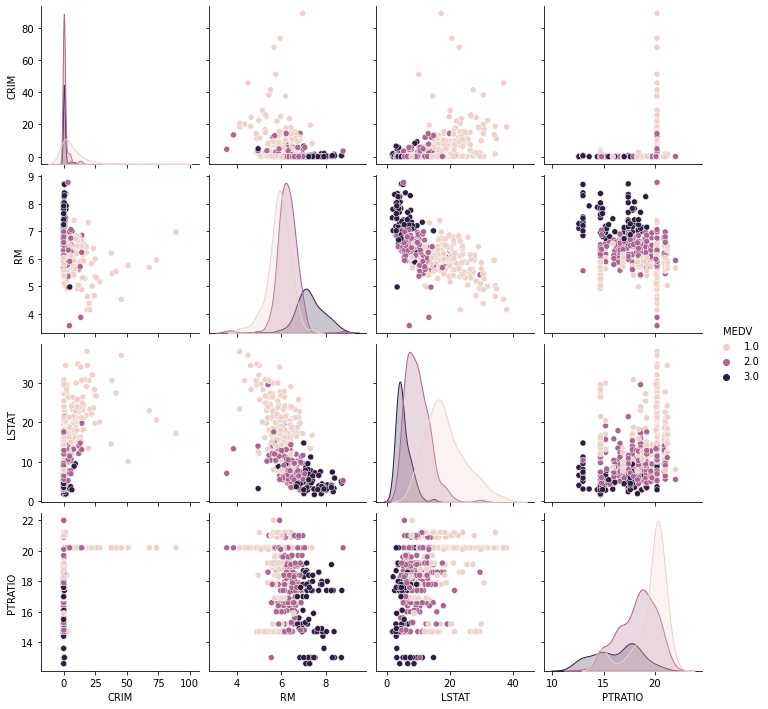

In [28]:
sns.pairplot(df, hue='MEDV',diag_kind="kde")

In [29]:
#Возьмём две фичи для возможности изобразить это в 2D: длину и ширину листка
Xcut = X[X.columns[1:3]]

In [30]:
#Используем классификатор
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf = DecisionTreeClassifier(max_depth=1)

In [32]:
clf.fit(Xcut, y)

DecisionTreeClassifier(max_depth=1)

In [33]:
predictions=clf.predict(Xcut)

In [34]:
df.MEDV.unique()

array([2., 3., 1.])

In [35]:
clf.predict_proba([ [1,1], [3,3] ])

array([[0.16199377, 0.57943925, 0.25856698],
       [0.16199377, 0.57943925, 0.25856698]])

In [36]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [37]:
def test_clf(clf, X, y,cy=0, fit_clf=False):
    xx,yy = get_grid(X.values)
    if fit_clf:
        clf.fit(X, y)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, predicted, cmap='Pastel1')
    plt.scatter(X.values[:, 0], X.values[:, 1], s=100, cmap='tab10',c=cy)
    if fit_clf:
        return clf

<ipython-input-37-ab1550250121>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='Pastel1')


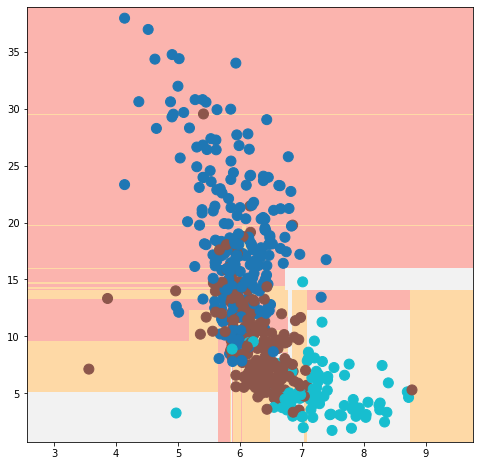

In [38]:
clf = test_clf(DecisionTreeClassifier(), Xcut, y,cy=y['MEDV'].tolist(), fit_clf=True)

In [ ]:
test_H(HEntropy, predictions)

In [40]:
HEntropy(predictions)

0.9472437020425769

In [ ]:
test_H(HGini, predictions)

In [42]:
HGini(predictions)

0.46388007936383946

In [ ]:
test_H(HGini, predictions[373:])